Osnabrück University - Computer Vision (Winter Term 2021/22) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 8: Recognition 

## Introduction

This week's sheet should be solved and handed in before the end of **Tuesday, January 18, 2022**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Exercise 0: Math recap (Covariance) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What does *covariance* express?

YOUR ANSWER HERE

**b)** Provide a formula to compute the covariance of two 1-dimensional datasets. How can it be generalized to the $n$-dimensional case?

YOUR ANSWER HERE

**c)** Create and plot two (1-dimensional) datasets with low covariance (use `plt.scatter`). Then do the same for two datasets with high covariance.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# YOUR CODE HERE

## Exercise 1: Template Matching Theory [2 points]

**a)** Explain in your own words the idea of *template matching*. Is it a data or model based approach? What are the advantages and disadvantages? In what situations would you apply template matching?

Template matching is a method of identifying images by matching a small part of that image to a template which you have created, that is a simplified version of what you are looking for. It is a model based approach, as you have created a simplified image template that you are moving over the image row by row. It's advantages are that it is very fast. It is often used in industrial image processing.

**b)** Explain the ideas of *mean absolute difference* and *correlation coefficient*. Name pros and cons.

Mean Absolute Difference is the mean absolute difference between the grey values of the pixels in the image and the template. Problems can arise though, when additional maxima are produced by your template, because an object in the image looks very similar to the template, but does not match it exactly (scaling of the grey values of the template by a factor, or by subtracting a constant offset produce these problems). Conversly, Correlation Coefficient is only dependent on shape and does not consider grey values. it is produced by taking the difference of the image and the mean grey value of the image, and then the template minus the mean grey value of the template and multiply these values at all positions. This method is more robust against noise and scaling, but problems can arise when the ratio of the intensity values in the template don't match the original grey value ratio.  

## Exercise 2: Template Matching Practice: Where is Waldo [2 points]

In the two images `wheresWaldo1.jpg` and `wheresWaldo2.jpg`, Waldo is hiding in the midst of a busy crowd. He always wears the same red and white striped sweater and hat. However, he may be carrying a something that varies from scene to scene. Use template matching with the given Waldo templates (`waldo*.jpg`) to locate Waldo. Highlight
Waldo in the scene and indicate which template was matched.

**Hints:**
* You may use buildin functions to solve this exercise. E.g `skimage.feature.match_template` or `cv2.matchTemplate`
* The images are quite large! You may start by testing your code on a small image patch before applying it to the full scene.
* You may not achieve a perfect match. Analyse the problems you encounter and think how you can improve your result.

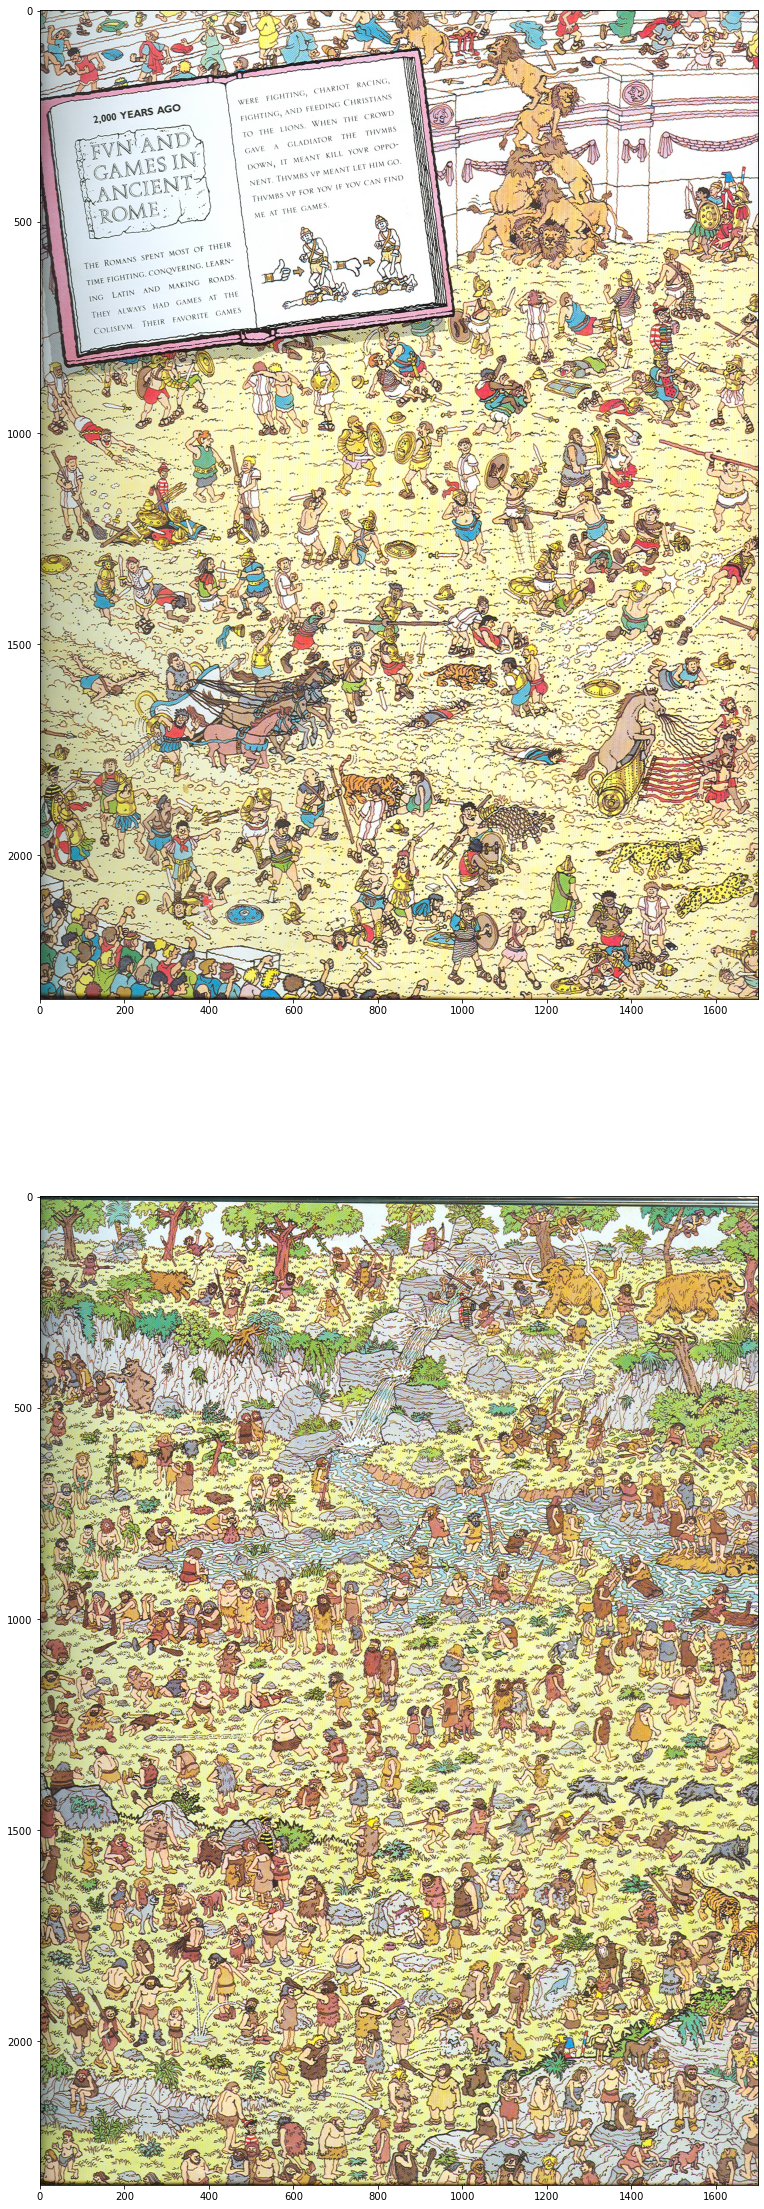

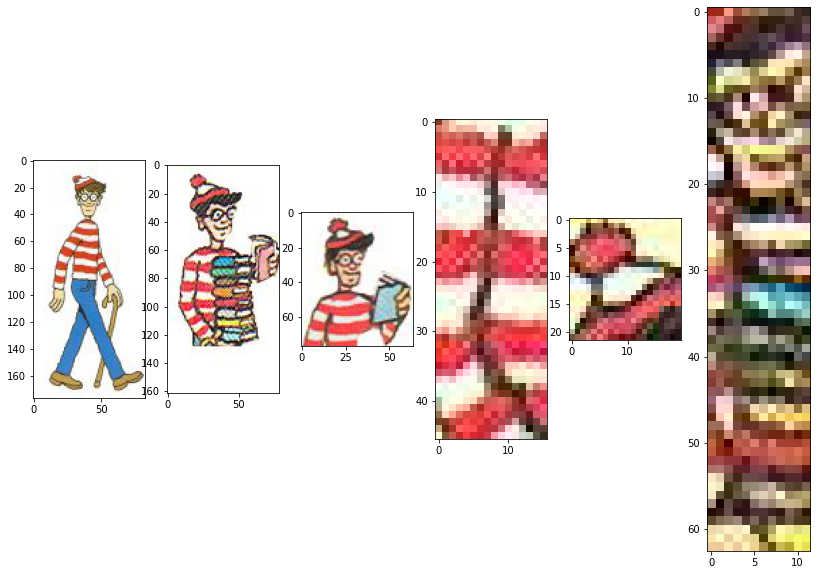

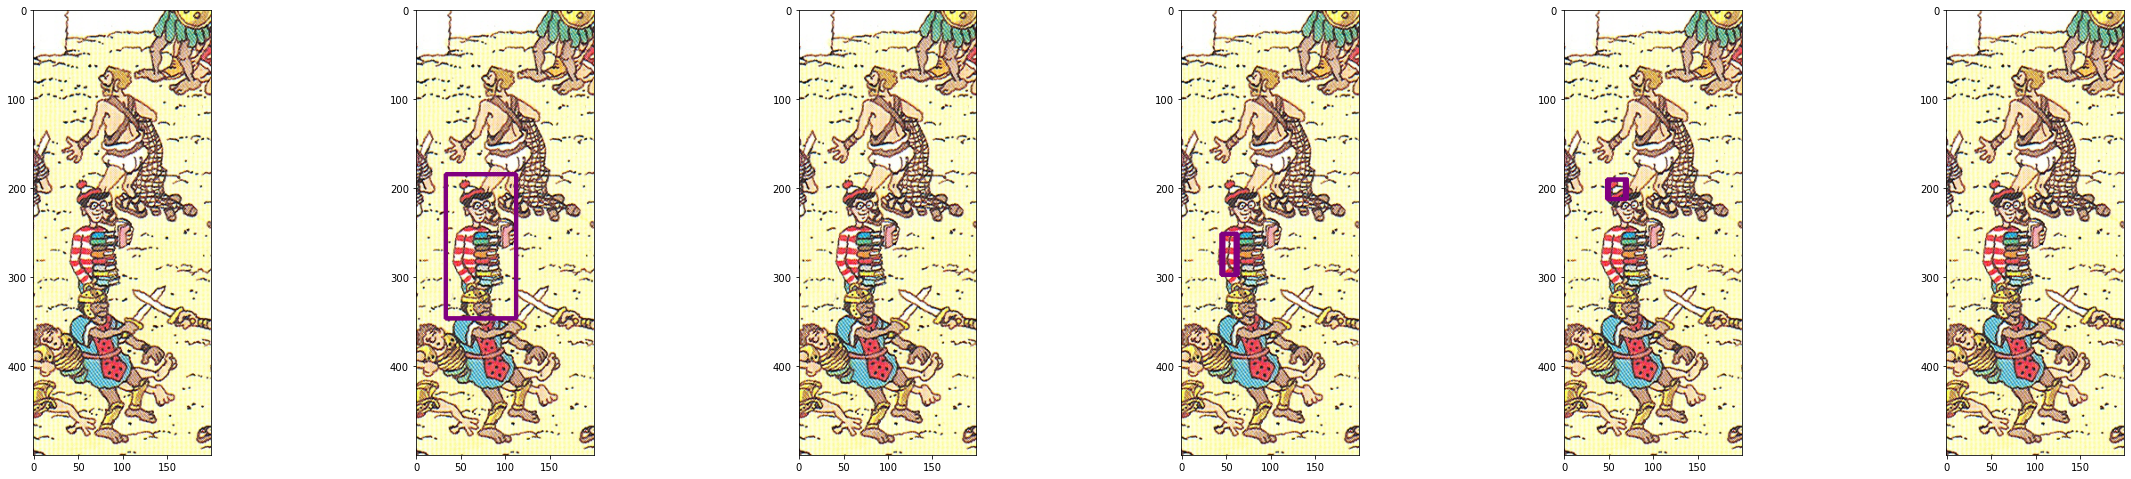

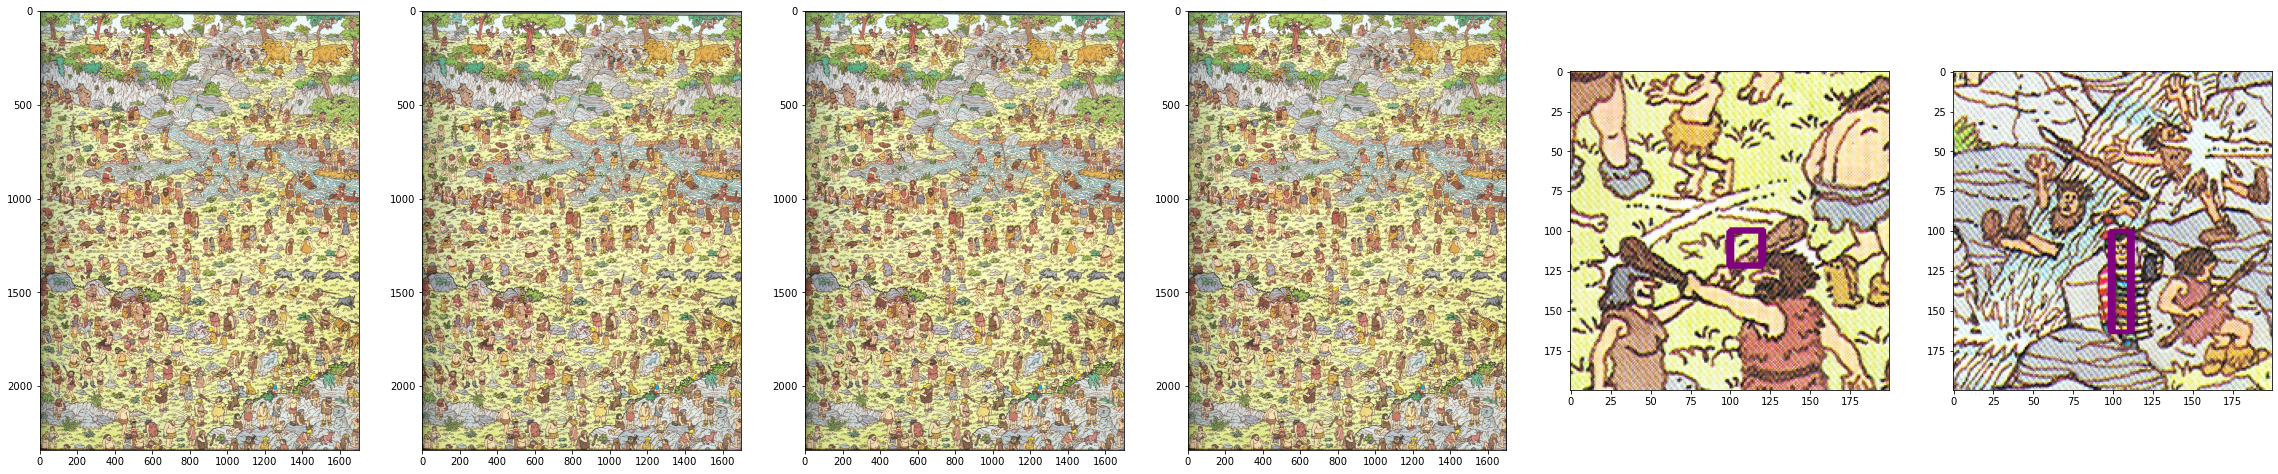

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 

waldos = [plt.imread('images/waldo/wheresWaldo{}.jpg'.format(i)) for i in range(1, 3)]
templates = [plt.imread('images/waldo/waldo{}.jpg'.format(i)) for i in range(0, 6)]

plt.figure(figsize = (14, 40))
for i,img in enumerate(waldos):
    plt.subplot(len(waldos),1,i+1)
    plt.imshow(img)
    
plt.figure(figsize = (14, 10))
for i,img in enumerate(templates):
    plt.subplot(1,len(templates),i+1)
    plt.imshow(img)
    
    
thresh = 0.5
for i, img in enumerate(waldos):
    plt.figure(figsize=(40, 18))
    # show each image together with all templates
    for j, template in enumerate(templates):
        # CCOEFF_NORMED worked best, others were too slow or just detecting too much
        # --> returns similarity map (map of correlation coefficients)
        matching = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
        matched_points = np.where(abs(matching) >= thresh)
        w = template.shape[1]
        h = template.shape[0]
        tmp_point = None
        tmp = img.copy()

        for pt in zip(*matched_points[::-1]):
            #draw rectangle on places where it exceeds threshold
            cv2.rectangle(tmp, pt, (pt[0] + w, pt[1] + h), (128, 0, 128), 2)
            tmp_point = pt
        plt.subplot(2, len(templates), j + 1)
        if i == 0:
            plt.imshow(tmp[500:1000, 1400:1600])
        else:
            if tmp_point != None:
                plt.imshow(tmp[pt[1] - 100:pt[1] + 100, pt[0] - 100:pt[0] + 100])
            else:
                plt.imshow(tmp)


## Exercise 3: Pattern Recognition and PCA [4 points]

**a)** What are the goals of *pattern recognition*? How can they be achieved? What are the problems?

The goal of pattern recognition is to get a symbolic description from sensor data.

It can be achieved following the standard architecture:

world -> sensor -> feature extraction -> classification
Problems:

no sharp description of classes and incomplete data

**b)** What is *principal component analysis*? How is it related to pattern recognition?

PCA is a process of chaning the basis of a data set by finding a line of best fit that minimises the mean square distance of the data set, and using this line to compute the princiiple components, to then perform a change of basis on the data. Essentially one tries to figure out what dimensions of the data are the most relevant to what ever outcome you are measuring. It is related to pattern recognition because PCA can help make multi-dimensional data linearly separable, and therfore more easily classifed, and therefore make patterns more recognisable. 

**c)** Explain how principal components can be computed? Then implement a function that performs the computation.

Principal components are the eigenvalues of the covariance matrix of a dataset. The eigenvalues give the ordering of the components.

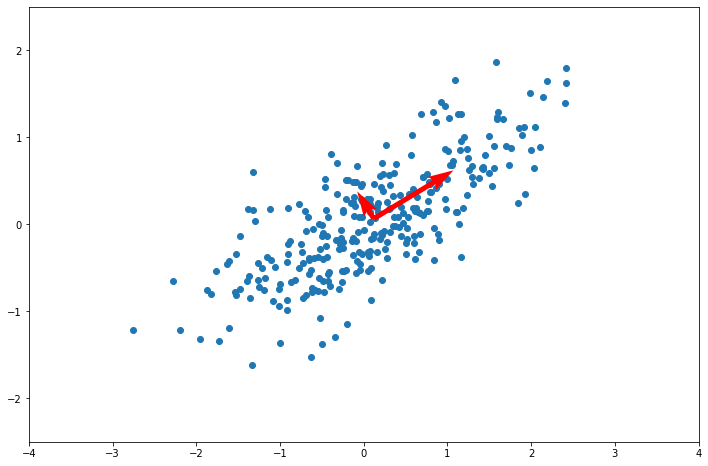

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def pca(data):
    """
    Perform principal component analysis.
    
    Args:
        data (ndarray): an array of shape (n,k),
        meaning n entries with k dimensions
        
    Returns: two arrays
        pc (ndarray): array of shape (k,k) holding the principal components in its columns.
        var (ndarray): k-vector holding the corresponding variances, in descending order.
    """
    
    # Replace the following two lines by your code ...
    pc = np.random.randn(data.shape[1],data.shape[1])
    var = np.random.rand(data.shape[1])
    # Center the data (subtract the mean along columns).
    centered_data = data - data.mean(axis=0)

    # Compute the covariance matrix
    covariance_matrix = centered_data.T @ centered_data / (len(data) - 1)
    
    # Computing eigenvalues and eigenvectors of covariance matrix.
    # Attention: not always sorted.
    eigenvals, eigenvecs = np.linalg.eig(covariance_matrix)
    
    # Sort in order of descending magnitude
    idx = np.argsort(eigenvals)[::-1]
    pc, var = eigenvecs[:,idx], eigenvals[idx]
    
    return pc, var

# generate some random data
np.random.seed(23)
data = np.random.multivariate_normal([0,0], cov = [[1, .55], [.55, .5]], size=300)

# compute the principal components
pc, var = pca(data)
mean = data.mean(axis=0)

# plot the results
plt.figure(figsize=(12,8))
plt.xlim(-4,4)
plt.ylim(-2.5,2.5)
plt.scatter(*data.T)
plt.quiver(*mean[np.newaxis].repeat(2,axis=0).T, *(np.sqrt(var)*pc), color='red', scale=1, scale_units='xy')
plt.show()

# sanity check
assert np.allclose(var, [1.216, 0.137], rtol=1e-3)

## Exercise 4: Eigenfaces [6 points]

**a)** Import the images from the directory `images/trainimgs` into an numpy array using the function 
`read_images_from_directory` provided in the cell below. Display the images and the corresponding names.

In [8]:
%matplotlib inline
import sys
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

def read_images_from_directory(directory, suffix, shape):
    """
    Read all images found in DIRECTORY with given file
    name SUFFIX. All images should have the same SHAPE,
    specified as (rows,columns).
    
    Args:
        directory (string): Name of input directory.
        suffix (string): File type suffix.
        shape (tuple): Shape of images to be loaded.
    
    Returns:
        images (ndarray): A numpy array of shape m*rows*columns (from shape)
        names (list): A list of corresponding image names.
    """

    # initialize the image array and name list
    #images = np.empty((0, *shape))
    images = np.empty((0, ) + shape)
    names = []

    # now loop through all image files in the directory
    for file_name in glob.glob(directory + os.sep + '*.' + suffix):
        if os.path.isfile(file_name):

            # load each image (as double)
            img = plt.imread(file_name)

            # check for correct size
            if img.shape == shape:
                images = np.append(images, img.reshape((1, ) + shape), axis=0)
                names.append(os.path.basename(file_name))
            else:
                print(
                    'warning: Image "' + file_name +
                    '" with wrong size will be ignored!',
                    file=sys.stderr)

    return images, names


# image file suffix
suffix = 'pgm'

# image size
img_shape = (192, 168)
train_imgs, train_names = read_images_from_directory('trainimg', 'pgm', img_shape)

plt.figure(figsize=(12, 12))
plt.gray()
for i, n in enumerate(train_names):
    plt.subplot(5, 4, i + 1)
    plt.axis('off')
    plt.imshow(train_imgs[i])
    plt.title(n[5:7])
plt.show()

<Figure size 864x864 with 0 Axes>

**b)** Use PCA to compute the eigenfaces (i.e. the eigenvectors of the face images). You may use your PCA function from Exercise 1c or some build in function. Explain what kind of input PCA expects, and how that fits to our images (you may have to `reshape` the images!). Finally, display the eigenfaces.

C:\Users\jesus\AppData\Local\Temp/ipykernel_16156/234521037.py:8: RuntimeWarning: Mean of empty slice.
  mean_face = face_vecs.mean(axis=0)
C:\Users\jesus\anaconda3\envs\computer_vision\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\jesus\AppData\Local\Temp/ipykernel_16156/234521037.py:45: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(eigenfaces @ eigenfaces.T)
C:\Users\jesus\AppData\Local\Temp/ipykernel_16156/234521037.py:45: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(eigenfaces @ eigenfaces.T)
C:\Users\jesus\anaconda3\envs\computer_vision\lib\site-packages\matplotlib\image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\jesu

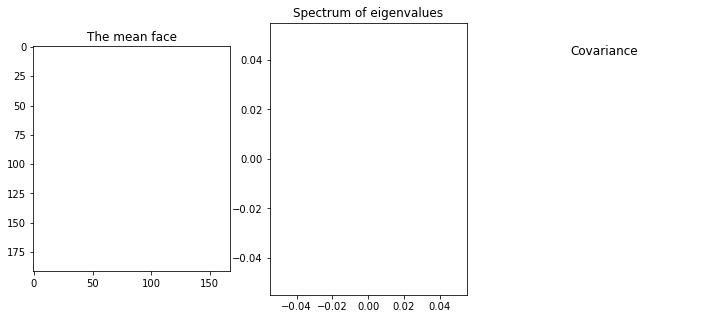

<Figure size 864x1152 with 0 Axes>

In [9]:
# Transform images into one-dimensional vectors.
# This will create a two dimension matrix of shape (n,k)
# with n being the number of images and k the number of
# pixels per image.
face_vecs = train_imgs.reshape((-1, np.prod(img_shape)))

# Compute the mean face.
mean_face = face_vecs.mean(axis=0)

# now we can project our images onto these eigenvectors,
# obtaining n eigenfaces (each of dimensionality k):
centered_faces = face_vecs - mean_face

# As in our case k is much greater than n, we swap the dimensions when performing PCA:
# Instead of computing the gigantic (k*k, k=32256) covariance matrix
#   Cov = 1/(N-1) X^T * X
# we compute the much smaller matrix (n*n, n=20)
#   M = 1/(N-1) X * X^T
matrix = centered_faces @ centered_faces.T / (len(centered_faces)-1)
    
# Computing eigenvalues and eigenvectors of covariance matrix.
# Attention: not always sorted.
eigenvals, eigenvecs = np.linalg.eigh(matrix)

# Sort in order of descending magnitude
idx = np.argsort(eigenvals)[::-1]
eigenvecs, eigenvals = eigenvecs[:,idx], eigenvals[idx]

# Now we can obtain the eigenfaces by projecting back into the original space.
eigenfaces = eigenvecs.T @ centered_faces

# Normalize the eigenfaces
eigenfaces = eigenfaces/np.linalg.norm(eigenfaces, axis=1)[:,np.newaxis]

assert len(eigenfaces) == len(face_vecs)

# Plot eigenvalues and eigenvectors
plt.figure(figsize=(12,5))
plt.gray();
plt.subplot(1,3,1); plt.title("The mean face")
plt.imshow(mean_face.reshape(img_shape))
plt.subplot(1,3,2); plt.title("Spectrum of eigenvalues")
plt.bar(np.arange(len(eigenvals)), eigenvals)
plt.subplot(1,3,3); plt.title("Covariance"); plt.axis('off')
plt.imshow(eigenfaces @ eigenfaces.T)
plt.show()

# ... and display the resulting eigenfaces:
plt.figure(figsize=(12, 16))
plt.gray()
for i, eigenface in enumerate(eigenfaces):
    plt.subplot(5, 4, i + 1)
    plt.axis('off')
    plt.imshow(eigenface.reshape(img_shape))
    plt.title(f"Eigenface {i} (var={100*eigenvals[i]/eigenvals.sum():.2f}%)")
plt.show()

**c)** Now project the training face images into the eigenspace to calculate their ”feature vectors”,
i.e. a representation with significantly lower dimension. For the projection of the face images,
they have to be centered first, i.e. the mean face vector has to be subtracted. Store the mean face in some vector (`mean_face`) and the representation achieved in some array (`face_db`). Finally restore the images from `face_db` and display them alongside the original image. Try out the effect of changing the number of eigenfaces to be used (`num_eigenfaces`).

In [5]:
# number of eigenfaces to be used
num_eigenfaces = 19

# Remark: a value of 20 (theoretical perfect reconstruction) may suffer from numerical
# instability (the last eigenface may introduce noise).
# However, a value of 19 suffices for almost perfect reconstruction ...


# Reduce the number of eigenfaces to achieve more dimensionality reduction.
eigenfaces_used = eigenfaces[:num_eigenfaces]

# Project images into the eigenface space and store
# them in a "eigenface database":
face_db = (face_vecs - mean_face) @ eigenfaces_used.T

# ... and display the original image and the stored image
print(f"Eigenfaces used: {len(eigenfaces_used)}/{len(eigenfaces)}")
plt.figure(figsize=(12, 12))
plt.gray()
for i, face in enumerate(face_db):
    restored = (face[np.newaxis] @ eigenfaces_used) + mean_face
    plt.subplot(5, 8, 2 * i + 1)
    plt.axis('off')
    plt.imshow(train_imgs[i])
    plt.title('original')
    plt.subplot(5, 8, 2 * i + 2)
    plt.axis('off')
    plt.imshow(restored.reshape(img_shape))
    plt.title('restored')
plt.show()

assert np.allclose(face_vecs, face_db @ eigenfaces_used + mean_face, atol=1e-4)


Eigenfaces used: 0/0


<Figure size 864x864 with 0 Axes>

**d)** Understand the function `recognize_face` that recognizes a face from that database by calculating the euclidean distance of this face feature vector to all of the training feature vectors from the database. The feature vector with the smallest distance represents the winner category. Check the implementation by recognizing the images from the training set (they should be recognized without error).

In [6]:
from scipy.spatial.distance import cdist

def recognize_face(face, eigenfaces, mean_face, face_db):
    """
    Recognize a face from a face database.
    and return the index of the best matching database entry.

    The FACE is first centered and projected into the eigeface
    space provided by EIGENFACES. Then the best match is found
    according to the euclidean distance in the eigenface space.
    
    Args:
        face (ndarray): Face to be recognised.
        eigenfaces (ndarray): Array of eigenfaces.
        mean_face (ndarray): Average face.
        face_db (ndarray): Database of faces projectected into Eigenface space.
        
    Returns:
        index (uint): Position of the best matching face in face_db.
    """
    index = -1


    # center the face
    centered = face - mean_face

    # and project it into the eigenface space
    projected = eigenfaces @ centered

    # Now compute the similarity to all known faces
    # (comparison is performed in the eigenface space)
    distances = cdist(face_db, projected[None, :])
    index = distances.argmin()



    return index


# ... and now check the function on the training set ...
def show_recognition_results(imgs, labels, train_imgs, train_labels,
                             num_eigenfaces, eigenfaces, mean_face, face_db):
    """Iterate over all face images and compute the best matching face in face_db.
    
    Args:
        imgs (list): List of test faces.
        train_imgs (list): List of training faces.
        train_labels (list): List of training labels.
        num_eigenfaces (uint): Number of eigenfaces.
        eigenfaces (list): List of the eigenfaces.
        mean_face (ndarray): Average face.
        face_db (ndarray): Database of faces projectected into Eigenface space.
        
    Returns:
    
    """
    
    img_shape = imgs[0].shape
    plt.figure(figsize=(12, 12))
    plt.suptitle(
        'Face recognition based on {} principal components'.format(num_eigenfaces))
    plt.gray()
    for j, img in enumerate(imgs):

        # find the best match in the eigenface database
        winner = recognize_face(
            img.reshape(np.prod(img_shape)), eigenfaces, mean_face, face_db)
        name_label = labels[j][5:7]
        name_winner = train_labels[winner][5:7]

        plt.subplot(5, 8, 2 * j + 1)
        plt.axis('off')
        plt.imshow(img)
        plt.title(labels[j][5:7])

        plt.subplot(5, 8, 2 * j + 2)
        plt.axis('off')
        plt.imshow(train_imgs[winner])
        t = plt.title(('*' if name_label != name_winner else '') + name_winner)
        plt.setp(t, color='r' if name_label != name_winner else 'g') 
    plt.show()
    
show_recognition_results(train_imgs, train_names,
                         train_imgs, train_names,
                         num_eigenfaces, eigenfaces_used, 
                         mean_face, face_db)


IndexError: index 0 is out of bounds for axis 0 with size 0

**e)** Now classify the images in directory `images/testimg/`. Try to reduce the number of principal components
used. How many PCs are necessary to still achieve perfect classification?

In [7]:
test_imgs, test_names = read_images_from_directory('images/testimg', suffix,
                                                   img_shape)

show_recognition_results(test_imgs, test_names,
                         train_imgs, train_names,
                         num_eigenfaces, eigenfaces_used, 
                         mean_face, face_db)

ValueError: attempt to get argmin of an empty sequence

<Figure size 864x864 with 0 Axes>

## Exercise 5: Understanding the Wireframe-Model [5 points]

This exercise addresses the matching procedure described on (CV-12 Model Based Recognition slides 9-17)

**a)** Explain in your own words the functions on slide  (CV-12 slide 9). Also explain when and why it may make sense to use $m$ instead of $m'$.


From the initial pose, the wire frame model is iteratively adapted to the image based on gradients.
    $m$: magnitude, $\beta$: orientation, $g(x, y)$: image
    **$x$-gradient**: $\Delta_x g = g(x+1, y) - g(x-1, y) \rightarrow$ for a fixed $y$, it's the difference between the pixels to the left and to the right
    **$y$-gradient**: $\Delta_y g = g(x, y+1) - g(x, y-1) \rightarrow$ for a fixed $x$, it's the difference between the pixels to above and below
    **gradient magnitude**: $m'(x, y) = \sqrt{\Delta_x g^2 + \Delta_y g^2}$
    **orientation:** Use the inverse tangent: $\beta(x, y) = arctan(\frac{\Delta_y g}{\Delta_x g})$
   
   For the gradient magnitude, there's an alternative computation which is thresholded:
    $m(x, y) = \Theta(m'(x, y) - T)$ (only takes magnitudes that are sufficiently large)
    
   **TODO**: When and Why $m$ instead of $m'$?

**b)** Explain the fitness score $E_{si}$ and $E_l$. What do the arrows (CV-12 slide 11), e.g. $\beta_j$ and $S_j$, indicate? What is the idea of $G(d)$?

$E_{S_i}$ - Fitness score for pixel $S_i$ in search rectangle $R$: $E_{S_i} = |m(x, y) \cdot (\sin (\beta(x, y) - \alpha))|$
    - fitness must be proportional to the gradient magnitude $m(x, y)$ (only strong gradients should contribute, not noise)
    - $\beta$ (gradient orientation), $\alpha$ (direction of the line) - we take their difference
        - if the difference is $0$, it's bad, so we take the $\sin$ and get a fitness score of $0$
        - it would be perfect if they are perpendicular ($90°$), then the $\sin$ is $1$
    
$E_l$ - Total fitness score of line segment $l$: $E_l = \sum_{S_i \in R} E_{S_i} \cdot G_{\mu = 0, \sigma = W} (d_i)$
    - sum of fitness scores over all pixels $S_i$ of search rectangle $R$
    - weighted by Gaussian distance function
    - why the search rectangle?
        - what we want is that pixels are on the line segments and that these belong to the edge
        - but we could not guide the search then
        - we have to look to the left and right of the line segment
        - pixels to the left and right contribute a little, but not as much as the ones perfectly on the line
        - that's why we have this Gaussian weighting ($\sigma$ is chosen appropriately based on the width of the rectangle)
        - if we have a certain fitness, the fitness score $E_{S_j}$ of pixel $S_j$ can be improved by moving the line segment in the direction $\beta_j$
    - the Gaussian distance function is there to guide the search in the parameter space

**c)** Explain the goal of EDA (Estimation of Distribution Algorithm) and how it is performed in the context of the matching procedure.

The goal is to optimize the 15 shape, position, and pose parameters to fit the local gradients.

We start with a generation of individuals (several wireframe models) which have different position, pose, and shape parameters.
This generation needs to be optimized. Each of the individuals is just a point in the 15D space, so we start with a point cloud in the 15D space.

Now, the next generation will be sampled from this distribution and with a random process new individuals will be produced.
We project those into the plane and compute the fitness scores.
Finally, the selection comes into play: We choose a certain number of individuals with highest fitness scores
and only from these compute the next generation (survival of the fittest).

Generation of new individuals: Gaussian density estimation of remaining point cloud.
We use the density estimation as a biased random number generator to produce new points. The parents give a bias to the offspring,
but the offspring does not perfectly confirm to that. There is a chance for the next generation to be different (better).

The process works Iteratively until the specified stop criterion is met.

## Exercise 6: Histogram of Oriented Gradients (HOG) [3 points]

The *Histogram of Oriented Gradients (HOG)* applied in the initial step of the wireframe matching procedure is also applied in other computer vision algorithms, especially in the context of object recognition. This exercise will examine this tool in a bit more detail.

**a)** Explain the idea of the histogram of oriented gradients. How can it be applied to analyze images? Think how this idea may be used to recognize objects?

The technique counts occurrences of gradient orientations in an image, it's basically a feature descriptor that can be used for object detection.

Gradients ( and  derivatives) of an image are useful because the magnitude of gradients is large around edges and corners
(regions of abrupt intensity changes) and edges and corners provide a lot more information about object shape than flat regions.

To calculate a HOG descriptor, we need to first calculate the horizontal and vertical gradients.
This is easily achieved by filtering the image with the horizontal and vertical Sobel filters  and .
Afterwards, we can get the magnitude and direction of the gradient using the formulas from the previous task.

At every pixel, the gradient has a magnitude and a direction. The next step is to create a histogram of gradients.
A bin is selected based on the direction, and the vote (the value that goes into the bin) is selected based on the magnitude.

Finally, we have all the information we need in a kind of compressed way. Such a histogram of oriented gradients can be
further processed and become a feature vector that can for example be used in classification.

**b)** The Scikit-image library provides the function [`hog`](https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html) that can compute histograms of oriented gradients and offers also an option to construct a visualization. Run the following code cell and then describe your observations in the text cell below:

<IPython.core.display.Javascript object>


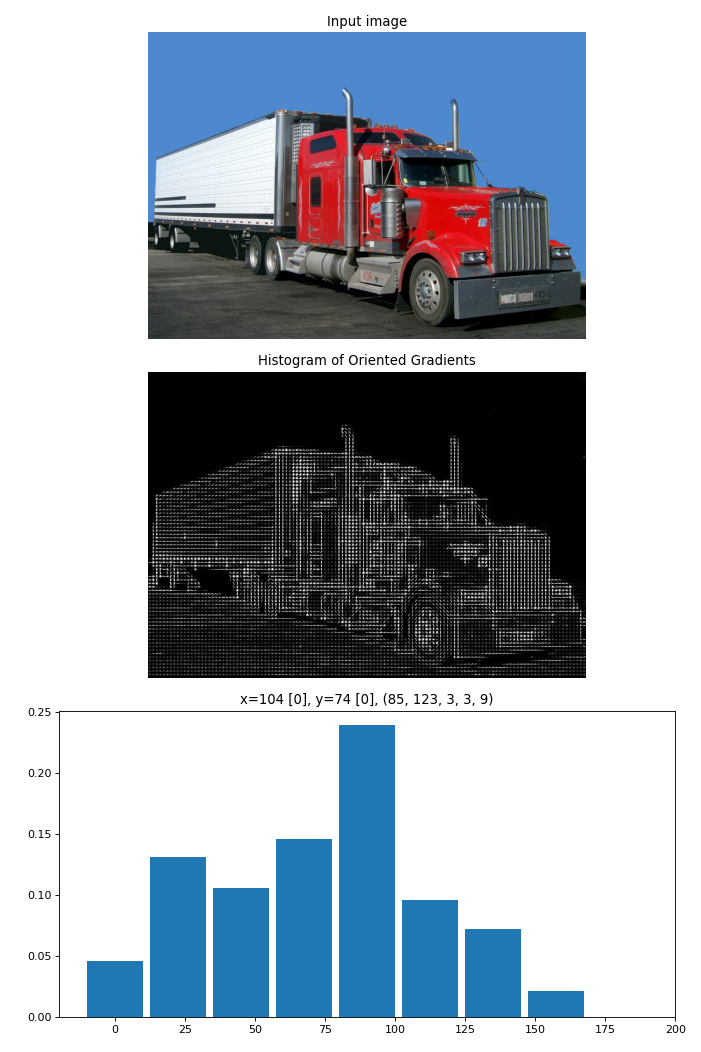

In [4]:
%matplotlib notebook

import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
from skimage.transform import resize
import numpy as np
import imageio

image = imageio.imread('./images/truck.jpeg')
image = resize(image,(700,1000),preserve_range=True).astype(np.uint8)

fd, hog_image = hog(image,feature_vector=False,visualize=True, multichannel=True)
#multichannel is depcricated starting from skimage 0.19.0, use channel_axis instead
# fd, hog_image = hog(image,feature_vector=False,visualize=True, channel_axis=2)

# Display the result
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8, 12))

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

bars = ax3.bar(np.linspace(0,180,fd.shape[-1]),fd[0,0,0,0],width=(180/fd.shape[-1]))

plt.tight_layout()
plt.show()

def on_press(event):
    """Mouse button press event handler
    Args:
    event: The mouse event
    """
    x, y = int(event.xdata)//8, int(event.ydata)//8
    
    cell_x = x - fd.shape[1] if x >= fd.shape[1] else 0
    x = min(x,fd.shape[1]-1)
    cell_y = y - fd.shape[0] if y >= fd.shape[0] else 0
    y = min(y,fd.shape[0]-1)
    ax3.clear()
    ax3.set_title(f"x={x} [{cell_x}], y={y} [{cell_y}], {fd.shape}")
    ax3.bar(np.linspace(0,180,fd.shape[-1]),fd[y,x,cell_y,cell_x],width=(180/fd.shape[-1]))
    fig.canvas.draw()

cid = fig.canvas.mpl_connect('button_press_event', on_press)

YOUR ANSWER HERE

**c)** Implement your own version of the histogram of oriented gradients function. You may proceed in the following steps:
1. Compute the gradient image and determine magnitude and direction of gradients.
2. Divide the image into cells and compute a weighted histogram for each cell.
3. Use the function to [`plt.quiver`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html) to display your results (already implemented).

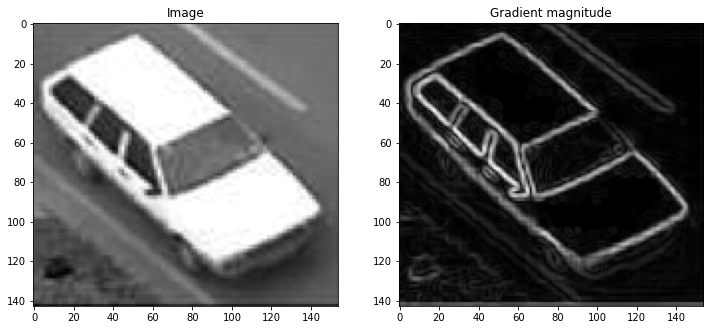

In [6]:
# Step 1: compute gradients

%matplotlib inline
import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import ndimage


def image_gradients(image):
    """Compute graident magnitudes and directions for a given image.
    
    Input:
        image: an numpy.ndarray of shape (HEIGHT, WIDTH)
    Result:
        magnitude, direction: two numpy.ndarrays of the same shape as image,
        holding gradient magnitudes and directions, respectively.
    """
    # Hint: you may ues the sobel function to obtain x- and y- gradients
    magnitude = np.zeros_like(image, dtype=np.float32)
    direction = np.zeros_like(image, dtype=np.float32)
    horizontal = ndimage.sobel(image, 0)
    vertical = ndimage.sobel(image, 1)
    
    for x in range(horizontal.shape[0]):
        for y in range(horizontal.shape[1]):
            magnitude[x][y] = np.sqrt(horizontal[x][y] ** 2 + vertical[x][y] ** 2)
            if horizontal[x][y] != 0:
                direction[x][y] = np.arctan(vertical[x][y] / horizontal[x][y])
            else:
                direction[x][y] = 0
    return magnitude, direction

image = rgb2gray(imageio.imread('./images/car.png').astype(np.uint8))
magnitude, direction = image_gradients(image)

plt.figure(figsize=(12,6))
plt.gray()
plt.subplot(1,2,1); plt.title("Image")
plt.imshow(image)
plt.subplot(1,2,2); plt.title("Gradient magnitude")
plt.imshow(magnitude)
plt.show()

In [7]:
# Step 2: compute the histograms

def histogram_of_oriented_gradients(image, cell_size=(16,16), bins=9):
    """Compute histograms of oriented gradients for an image.
    Input:
        image: image: an numpy.ndarray of shape (HEIGHT, WIDTH)
        cell_size: the size of individual cells into which the image is divided
        bins: the number of bins per histogram
    Result:
        An np.ndarray of shape (CELL_ROWS, CELL_COLUMNS, BINS) containing
        the histograms for the individual cells
    """
    # Hint: you may use np.histogram() here
    rows, columns = image.shape[0]//cell_size[0], image.shape[1]//cell_size[1]
    hog = np.zeros((rows, columns, bins))
    magnitude, direction = image_gradients(image)
    # image is divided into 16×16 cells and a histogram of gradients is calculated for each 16x16 cells
    # --> 2 values (magnitude and direction) per pixel
    # --> 16x16x2 = 512 numbers are represented using a 9-bin histogram
    # the histogram is essentially a vector (array) of 9 bins
    
    # a bin is selected based on the direction, and the vote (the value that goes into the bin)
    # is selected based on the magnitude

    hog = []
    for r in range(rows):
        for c in range(columns):
            curr_direction = np.ndarray.flatten(direction[r:r+cell_size[0]][c:c+cell_size[1]])
            curr_magnitude = np.ndarray.flatten(magnitude[r:r+cell_size[0]][c:c+cell_size[1]])            
            hog.append(np.histogram(a=curr_direction, bins=bins, weights=curr_magnitude))
    return hog

hog = histogram_of_oriented_gradients(image)

AttributeError: 'list' object has no attribute 'shape'

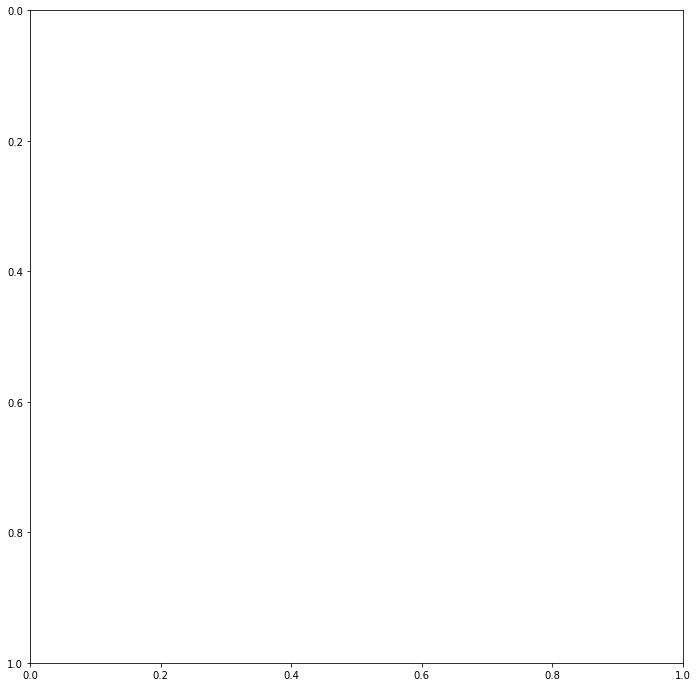

In [9]:
# Step 3: display your results

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

cell_size=(8,8)
hog = histogram_of_oriented_gradients(image, cell_size=cell_size)

plt.figure(figsize=(12,12))
plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()

y, x = np.arange(hog.shape[0])*cell_size[0], np.arange(hog.shape[1])*cell_size[1]
for angle in range(hog.shape[-1]):
    rad = angle * np.pi / hog.shape[-1]
    u = hog[:,:,angle] * np.sin(rad)
    v = hog[:,:,angle] * np.cos(rad)
    plt.quiver(x,y,u,v,scale=200.)
    plt.quiver(x,y,-u,-v,scale=200.)

plt.show()